In [1]:
# Scenarios for Project

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
class Die():
    
    def __init__(self, faces):
        for i in faces:
            if type(i) != float and type(i) != int and type(i) != str:
                print("Die must be a list of numbers or strings")
                
        self.faces = faces
        self.weightslist = [1] * len(faces)
        self.die = pd.DataFrame({'face': self.faces,'weights': self.weightslist})
    
    def change_weight(self, j, new_weight):
        if type(new_weight) != float and type(new_weight) != int:
            print('This is not a valid weight')
        elif type(new_weight) == float or type(new_weight) == int:
            if j in self.faces:
                index_finder = self.faces.index(j)
                self.weightslist[index_finder] = new_weight
            elif j not in self.faces:
                print("This face is not in the die")
        
        self.die = pd.DataFrame({'face': self.faces,'weights': self.weightslist})
        
    def play_game(self, number_rolls = 1):
        game_results = [self.die.face.sample(weights=self.weightslist).values[0] for i in range(number_rolls)]
        return(game_results)
        
    def display_dice(self):
        print(self.die)

In [172]:
class Game():
    
    def __init__(self, dice):
        self.dice = dice
        
    def play_the_game(self, n_plays):
        self.n_plays = n_plays
        dice_count = 1
        global dice_names 
        dice_names = []
        global numb_roll 
        numb_roll = []
        global dices 
        dices = {}
        global __games_list 
        __games_list = pd.DataFrame(dices)

        for i in self.dice:
            die_name = 'Die' + str(dice_count)
            dice_names.append(die_name)
            dices[die_name] = []
            dice_count += 1    
   
        c = 0

        for dice_piece in self.dice:
            c += 1
            col = []
            for play in range(self.n_plays):
                die_name = 'Die ' + str(c)
                roll = dice_piece.play_game()
                if c == 1:
                    numb_roll.append(play + 1)
                col.append(roll)

            __games_list[die_name] = col
            __games_list[die_name] = __games_list[die_name].str[0]
        __games_list['Roll Number'] = numb_roll
                
        __games_list.set_index("Roll Number", inplace = True)
        self.games_list = __games_list
        return __games_list
        
    def show_df(self, width = 'W'):
        if width == "N" or width == "W" or width == "":
            dummy_variable = 1
        try:
            dummy_variable 
        except: 
            print('Width must be set to either N (for narrow) or W (for wide). Default is set to wide')

        if width == "W" or width == "":
            return __games_list
        elif width == "N":
            games_narrow = __games_list.stack().to_frame('Face Rolled')
            return games_narrow
            
        

In [259]:
from collections import Counter

class Analyzer():
    
    def __init__(self, played_game):
        self.played_game = played_game
        # Inferring data faces of game used?
    
    def jackpot(self):
        global Play 
        Play = self.played_game.show_df()
        Jackpots = Play.eq(Play.iloc[:, 0], axis=0).all(1)
        Jackpots = Jackpots[Jackpots]
        JackPots_DF = display(Play.loc[Jackpots.index])
        self.jackpots_df = JackPots_DF
        self.number_of_jackpots = len(Jackpots)
        print(self.number_of_jackpots)
        return self.jackpots_df
        
    def combos(self):
        combos_rolls2 = pd.DataFrame(Play.value_counts())
        combos_rolls2.columns =['Number of Occurences']
        combos_rolls2.apply(Counter, axis='columns').value_counts()
        self.combinations = combos_rolls2

    def counts_per_roll(self):
        self.counts_table = Play.apply(pd.Series.value_counts, axis=1).fillna(0)
        return self.counts_table
        

In [260]:
# Scenario 1
FairCoin1 = Die(['H','T'])
FairCoin2 = Die(['H','T'])
FairGame = Game([FairCoin1, FairCoin2])
FairGame.play_the_game(1000)
FairAnalyzer = Analyzer(FairGame)
FairJackpots = FairAnalyzer.jackpot()

,Die 1,Die 2
Roll Number,,
4,H,H
6,T,T
9,T,T
10,T,T
11,H,H
...,...,...
992,T,T
995,T,T
996,T,T


498


In [261]:
UnfairCoin1 = Die(['H','T'])
UnfairCoin1.change_weight(2,5)
UnfairGame = Game([FairCoin1, FairCoin2, UnfairCoin1])
UnfairGame.play_the_game(1000)
UnfairAnalyzer = Analyzer(UnfairGame)
UnfairJackpots = UnfairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
18,T,T,T
20,H,H,H
31,T,T,T
33,T,T,T
43,T,T,T
...,...,...,...
990,T,T,T
992,T,T,T
995,T,T,T


253


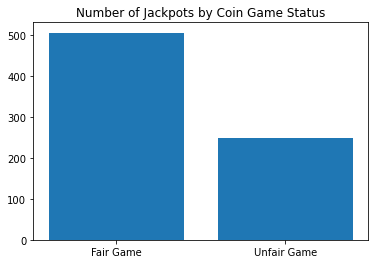

In [158]:
name_of_game = ['Fair Game', 'Unfair Game']
game_result = [FairAnalyzer.number_of_jackpots, UnfairAnalyzer.number_of_jackpots]
game_result
plt.bar(name_of_game,game_result)
plt.title('Number of Jackpots by Coin Game Status')
plt.show()

In [159]:
# Scenario 2

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. 
One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). 
The other unfair die (Type 2) will  weight 1 five times more than the others.
Play a game of 10000 rolls with 5 fair dice.
Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [242]:
FairDie = Die([1,2,3,4,5,6])
UnfairDie1 = Die([1,2,3,4,5,6])
UnfairDie2 = Die([1,2,3,4,5,6])
UnfairDie1.change_weight(6,5)
UnfairDie2.change_weight(1,5)

In [267]:
FairDieSet = ([FairDie, FairDie, FairDie, FairDie, FairDie])
FairDiceGame = Game(FairDieSet)
FairDiceGame.play_the_game(1000)
FairDiceAnalyzer = Analyzer(FairDiceGame)
FairDiceJackpots = FairDiceAnalyzer.jackpot()
FairDiceAnalyzer.jackpots_df

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
546,4,4,4,4,4
717,1,1,1,1,1


2


In [269]:
UnfairDieSet = ([UnfairDie1, UnfairDie1, UnfairDie2, FairDie, FairDie])
UnfairDiceGame = Game(UnfairDieSet)
UnfairDiceGame.play_the_game(1000)
UnfairDiceAnalyzer = Analyzer(UnfairDiceGame)
UnfairDiceJackpots = UnfairDiceAnalyzer.jackpot()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
214,5,5,5,5,5
464,6,6,6,6,6
710,6,6,6,6,6
920,6,6,6,6,6


4


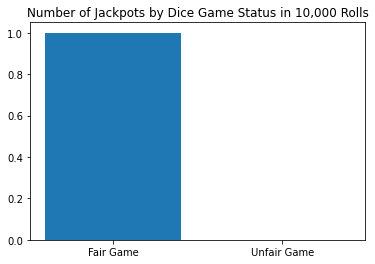

In [187]:
name_of_game = ['Fair Game', 'Unfair Game']
game_result = [FairDiceAnalyzer.number_of_jackpots, UnfairDiceAnalyzer.number_of_jackpots]
game_result
plt.bar(name_of_game,game_result)
plt.title('Number of Jackpots by Dice Game Status in 10,000 Rolls')
plt.show()

In [226]:
# 10 most common rolls for each game
UnfairDiceAnalyzer.combos()
top_10_unfair = UnfairDiceAnalyzer.combinations.head(10)
top_10_unfair

Number of Occurences
Die 1 Die 2 Die 3 Die 4 Die 5                      
6     6     1     3     3                         7
                  5     3                         6
                  4     1                         6
                  6     1                         6
                  2     2                         5
                  4     6                         5
                  6     5                         5
                        6                         5
                  2     4                         5
            2     3     2                         5

In [227]:
# Scenario 3
import string
Alphabet_string = string.ascii_lowercase[:26]
Alphabet_list = [i for i in Alphabet_string]
alphabet_die = Die([i for i in Alphabet_string])
weights_df = pd.DataFrame({"Letter": Alphabet_list, "Weighted": [8.4966,2.072,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,.2902,1.7779,0.2722]})
Weights = weights_df['Weighted']
alphabet_die.weightslist = [Weights[i] for i in range(len(alphabet_die.weightslist))]
#alphabet_die.display_dice()
Alphabets_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
Alphabets_game.play_the_game(1000)


,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1,u,y,l,h,t
2,m,c,n,b,r
3,i,t,g,s,e
4,o,w,n,i,e
5,s,h,k,e,h
...,...,...,...,...,...
996,m,u,e,c,e
997,t,i,e,p,e
998,s,o,l,e,o


In [228]:
Alphabets_analyzer = Analyzer(Alphabets_game)

In [229]:
Alphabets_analyzer.jackpot()

0


In [230]:
Alphabets_analyzer.combos()

In [231]:
Alphabets_analyzer.combinations

Number of Occurences
Die 1 Die 2 Die 3 Die 4 Die 5                      
i     s     t     l     e                         2
a     a     e     a     d                         1
o     t     u     e     v                         1
      o     s     a     s                         1
      p     s     o     a                         1
...                                             ...
g     t     r     p     h                         1
      v     d     t     t                         1
      y     t     f     g                         1
h     a     o     t     e                         1
z     l     r     m     i                         1

[999 rows x 1 columns]

In [232]:
Alphabets_analyzer.counts_per_roll()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
Roll Number,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
